<a href="https://colab.research.google.com/github/gbessardon/Land_Cover_comparison/blob/main/ESRI2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Running environment options

In [1]:
colab=1 # 1 running on google collab
drive=1 # 1 need to mount google drive

## ESRI 2020 folder location

In [2]:
ESRIpath='/content/drive/MyDrive/ESRI2020'

# Run on collab and drive

## MOUNT google drive

In [3]:
if drive==1:
  from google.colab import drive
  drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## install geopandas and pyrpoj for collab

In [4]:
if colab==1:
  !pip install geopandas
  !pip install pyproj

# import libraires

In [5]:
import os
from osgeo import gdal
from shapely import geometry

In [6]:
tiflist=[os.path.join(ESRIpath,f) for f in os.listdir(ESRIpath) if f.endswith('.tif')]

In [7]:
def extract_polygon(fn):
  opt=gdal.InfoOptions(format='json')
  info=gdal.Info(fn,options=opt)
  bounding_points=info['wgs84Extent']['coordinates'][0]
  return geometry.Polygon(bounding_points)

In [8]:
boundinglist=[extract_polygon(t) for t in tiflist]

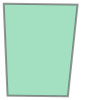

In [10]:
boundinglist[0]